<a href="https://colab.research.google.com/github/rajatdash/wip/blob/master/Project_Fraud_detection_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Common Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import stats 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = '/content/drive/My Drive/dataset_2.csv'
#path = "C://Users//rajat//Downloads//dataset_2.csv"

In [0]:
df = pd.read_csv(path)

In [6]:
df.head(2)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [0]:
#dimension reduction, duplicate removals, null value, PCA, correlation columns etc..
#missing values,outlier detection, normality check,distribution of data (skew, non-skew data), categorical data encoding
#features shoiuld be normally distributed (CLT - central limit theorem),
#minority class data detection, threshold, axioms - truth assumption, 5% at significance data
#target analysis - imbalance class (model bias can harm), Data Summary 
#bivariate anaysis - outlier detection, 

In [0]:
categorical_features = df.select_dtypes(include=np.object).columns  # ?df.select_dtypes
numerical_featuress = df.drop(['isFraud'],axis=1).select_dtypes(include=np.number).columns

In [8]:
print(categorical_features)
print(numerical_featuress)

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'], dtype='object')
Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339'], dtype='object', length=379)


**Drop the columns with more than 70% missing value**

In [0]:
df_nm = df[numerical_featuress]

In [0]:
cols = df_nm.columns[df_nm.isnull().mean() > 0.7]

In [0]:
#removing the numerical data which has more than 70% data missing
df_nm_working = df_nm.drop(cols,axis=1)

In [12]:
df_nm_working.shape

(590540, 212)

The below shows that there are quite a large number of columns which are having 5% missing value, 108 columns. 107 columns have more than 99% data (1% missing value)

In [13]:
# df_nm.drop(df_nm.columns[df_nm.isnull().mean() > 0.2],axis=1).shape
col_dict = {}
missing_val_per = [0.7,0.2,0.1,0.05,0.005,0.0001,0.00001] # percentage missing value
for val in missing_val_per:
  no_records_missing = round(df_nm_working.shape[0]*val*0.01,0)
  col_dict[no_records_missing] = df_nm.drop(df_nm.columns[df_nm.isnull().mean() > val],axis=1).shape[1]
print('The number of columns with missing value',col_dict)

The number of columns with missing value {4134.0: 212, 1181.0: 177, 591.0: 108, 295.0: 108, 30.0: 106, 1.0: 50, 0.0: 18}


As we can see there are as many as 18 records with full records and 50 with only one record missing.
We will strategize as to how we can deal with the missing value

# Missing Value Strategy

# missing value treatement as per block of data
     missing value - Impute by
      0-10%           Median
      11-20%          Random placement
      20-40%          Regression model
      40-70%          K-Nearest Neighbour model

In [14]:
df_nm_working.head(2)

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,19.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,13.0,13.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# 0-10% missing data
a_col = df_nm_working.columns[df_nm_working.isna().mean() < 0.11]
a = a_col.shape[0]

In [0]:
# 11%-20% missing data
b_col = df_nm_working.columns[(df_nm_working.isna().mean() > 0.10) & (df_nm_working.isna().mean() <= 0.20)]
b = b_col.shape[0]

In [0]:
# 21%-40% missing data
c_col = df_nm_working.columns[(df_nm_working.isna().mean() > 0.20) & (df_nm_working.isna().mean() <= 0.40)]
c = c_col.shape[0]

In [0]:
# 41%-70% missing data
d_col = df_nm_working.columns[(df_nm_working.isna().mean() > 0.40) & (df_nm_working.isna().mean() <= 0.70)]
d = d_col.shape[0]

In [19]:
#checking with the dictionary columns
print('a b c d = ',a,b,c,d)
a+b+c+d

a b c d =  108 69 19 16


212

# Impute the columns

In [0]:
# Strategy a, for 108 columns
mn = []
for col in a_col:
  mn.append(df_nm_working[col].median())
print(mn)
# checking the important substitution fields and what they represent
# print(a_col[0],a_col[1],a_col[2],a_col[6])
# print(mn[0],mn[1],mn[2],mn[4])
# print(df_nm_working['card5'].isna().sum())

In [63]:
check_nan = []
for col in a_col:
  df_nm_working[col].replace(np.nan,df_nm_working[col].median(),inplace=True)
  check_nan.append(df_nm_working[col].isna().sum())
print('Made replacements in : ',len(check_nan),' columns')

Made replacements in :  108  columns


In [41]:
df_nm_working['card5']

4259

# NORMALITY CHECK 

---




In [0]:
#Normality check, Outlier removal, log transformation log  and plot the data , root power of data (1/3)
# negatively skewed, take power of the data square and cube
from sklearn.preprocessing import StandardScaler,RobustScaler
std_scalar = StandardScaler()
rob_scalar = RobustScaler()
df_nm_working['scaledAmt'] = rob_scalar.fit_transform(df_nm_working['TransactionAmt'].values.reshape(-1,1))
df_nm_working['scaledTime'] = rob_scalar.fit_transform(df_nm_working['TransactionAmt'].values.reshape(-1,1))

In [0]:
df_nm_working.drop(['TransactionAmt','TransactionDT'],axis=1,inplace=True)

# Approach
Random undersampling technique:
We need to create another sample dataframe for creating a model. This will be tested agains the whole dataframe. Whether it is undersampling or oversampling method, we have to test it against the whole dataframe

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold

print('Fraud data present in this dataset',round(percentage_fraud,2))
print('Fair data present in this dataset',round(100-percentage_fraud,2))
X = df_nm_working
y = df['isFraud']

#skf = StratifiedKFold(n_splits = 5)
skf = StratifiedKFold(n_splits = 5)
for train_index, test_index in skf.split(X,y):
  print('Train: ',train_index ,'Test: ',test_index)
  orig_X_train, orig_X_test = X.iloc[train_index], X.iloc[test_index]
  orig_y_train, orig_y_test = y.iloc[train_index], y.iloc[test_index]
  
# Turn these into arrays
orig_X_train = orig_X_train.values
orig_X_test = orig_X_test.values
orig_y_train = orig_y_train.values
orig_y_test = orig_y_test.values

# find the unique labels in the X train and test, y train and test
train_unique_label, train_unique_count = np.unique(orig_y_train,return_counts=True)
test_unique_label, test_unique_count = np.unique(orig_y_test,return_counts=True)

# determine the percentage of uniqueness
print('*====*' * 20)
print('train:',train_unique_count/len(orig_y_train))
print('test:',test_unique_count/len(orig_y_test))
  

Fraud data present in this dataset 3.5
Fair data present in this dataset 96.5
Train:  [116771 116772 116773 ... 590537 590538 590539] Test:  [     0      1      2 ... 154537 154538 154540]
Train:  [     0      1      2 ... 590537 590538 590539] Test:  [116771 116772 116773 ... 253312 253376 253392]
Train:  [     0      1      2 ... 590537 590538 590539] Test:  [235448 235449 235450 ... 366821 366862 366877]
Train:  [     0      1      2 ... 590537 590538 590539] Test:  [353901 353902 353903 ... 472501 472502 472503]
Train:  [     0      1      2 ... 472501 472502 472503] Test:  [470280 470286 470298 ... 590537 590538 590539]
*====**====**====**====**====**====**====**====**====**====**====**====**====**====**====**====**====**====**====**====*
train: [0.96500879 0.03499121]
test: [0.96501477 0.03498523]


In [0]:
?StratifiedShuffleSplit

# Random Undersampling

In [0]:
'''
Our class is highly imbalanced. with 3.5% data is Fraud class and the rest is 96.5%. 
1. we must make the shape of the data as normal. Before anything, we must shuffle the dataframe
'''
fraud_cases = df[df.isFraud == 1]
print('the number of data having fraud case',len(fraud_cases))

df = df.sample(frac=1)
df_1 = df.loc[fraud_cases.index]

print(df_1.shape)

the number of data having fraud case 20663
(20663, 394)


In [0]:
df_0 = df.loc[df.isFraud == 0][:len(fraud_cases)]
print(df_0.shape)

(20663, 394)


In [0]:
#another implementation: for getting 50:50 
fraud_cases = df.isFraud == 1
df_1 = df.loc[fraud_cases]
df_0 = df.loc[~fraud_cases][:len(df_1)]
print(df_1.shape,df_0.shape)

(20663, 394) (20663, 394)


In [0]:
df_new = pd.concat([df_1,df_0])
df_new = df_new.sample(frac=1,random_state = 42)
df_new.shape

(41326, 394)

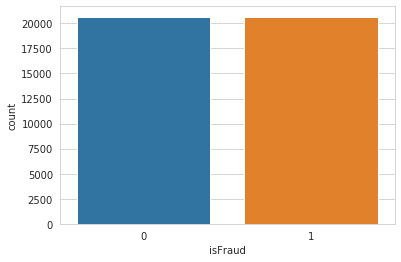

In [0]:
sns.set_style("whitegrid")
sns.countplot(df_new['isFraud'])

# Correlation check
  Here we will check the correlation among the features of the original dataset and the new dataset

Text(0.5, 1, "Original data frame correlation \n (Don't use this for reference)")

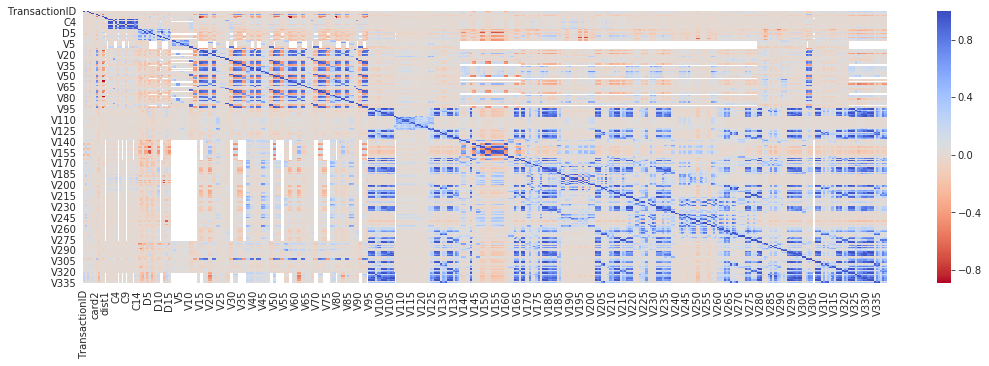

In [0]:
# fig,ax = plt.subplots(1,1,figsize=(12,5))
plt.figure(figsize=(18,5))
corr = df.corr()
sns.set_style("whitegrid")
sns.heatmap(corr,cmap='coolwarm_r',annot_kws={'font':14})
ax[0].set_title("Original data frame correlation \n (Don't use this for reference)")

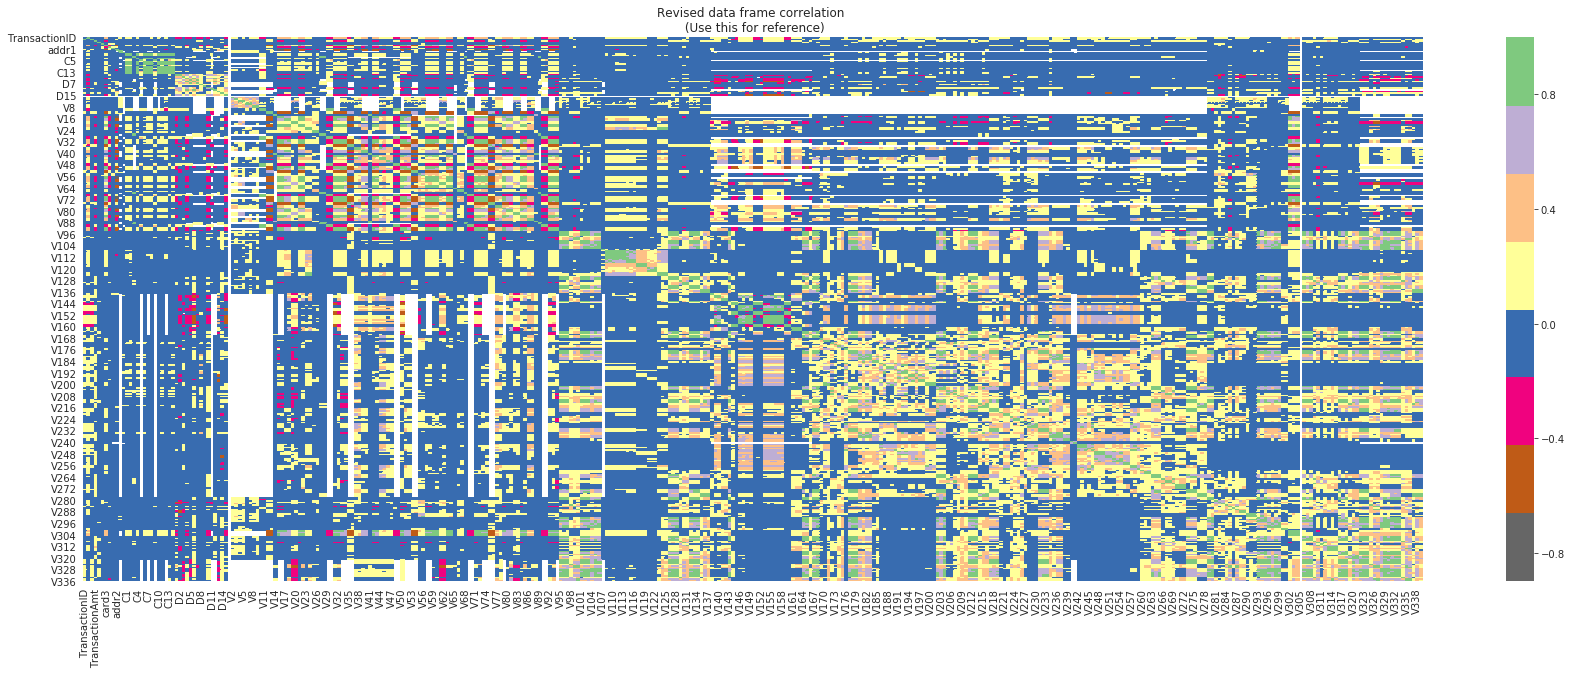

In [0]:
plt.figure(figsize=(30,10))
corr_new = df_new.corr()
sns.set_style("whitegrid")
sns.heatmap(corr_new,cmap='Accent_r',annot_kws={'font':14})
plt.title("Revised data frame correlation \n (Use this for reference)")
plt.show()

# Box plot on some correlations

In [0]:
#box plot on feature V95
sns.boxplot(x=df_new.V95,y=df_new.isFraud,data=df_new)

Text(0.5, 1.0, 'TransactionAmt vs Class Positive Correlation')

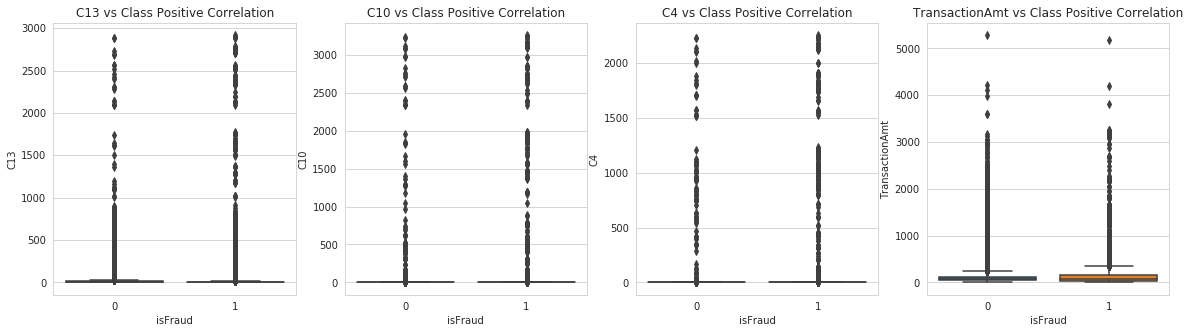

In [0]:
#Positive Corelation
fig,ax = plt.subplots(ncols=4,figsize=(20,5))
sns.boxplot(y='C13',x='isFraud',data=df_new, ax=ax[0])
ax[0].set_title('C13 vs Class Positive Correlation')

sns.boxplot(y='C10',x='isFraud',data=df_new, ax=ax[1])
ax[1].set_title('C10 vs Class Positive Correlation')

sns.boxplot(y='C4',x='isFraud',data=df_new, ax=ax[2])
ax[2].set_title('C4 vs Class Positive Correlation')

sns.boxplot(x='isFraud',y='TransactionAmt',data=df_new, ax=ax[3])
ax[3].set_title('TransactionAmt vs Class Positive Correlation')

Text(0.5, 1.0, 'V320 vs Class Negative Correlation')

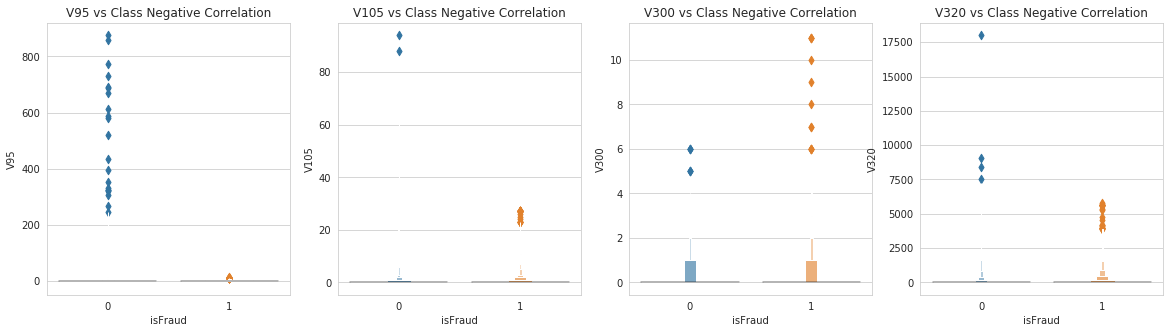

In [0]:
#Negative correlations
fig,ax = plt.subplots(ncols=4,figsize=(20,5))
sns.boxenplot(y='V95',x='isFraud',data=df_new, ax=ax[0])
ax[0].set_title('V95 vs Class Negative Correlation')

sns.boxenplot(y='V105',x='isFraud',data=df_new, ax=ax[1])
ax[1].set_title('V105 vs Class Negative Correlation')

sns.boxenplot(y='V300',x='isFraud',data=df_new, ax=ax[2])
ax[2].set_title('V300 vs Class Negative Correlation')

sns.boxenplot(x='isFraud',y='V320',data=df_new, ax=ax[3])
ax[3].set_title('V320 vs Class Negative Correlation')

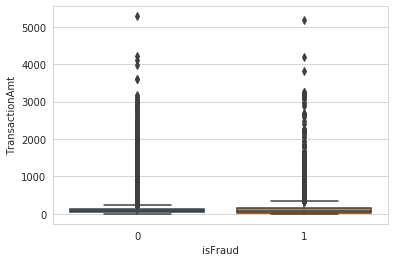

In [0]:
sns.boxplot(x='isFraud',y='TransactionAmt',data=df_new)

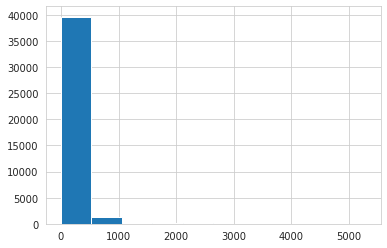

In [0]:
df_new['TransactionAmt'].hist()

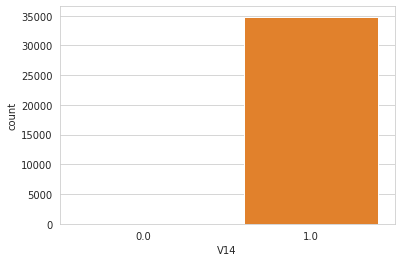

In [0]:
from scipy.stats import norm
#v14 fraud distribution
df_new['V14'].loc[df_new.isFraud == 1].value_counts()
sns.countplot(df_new.V14)

In [0]:
df_new.V14.isnull().sum()


6485

In [0]:
df_new.V14.replace(np.nan,df_new.V14.median(),inplace = True)

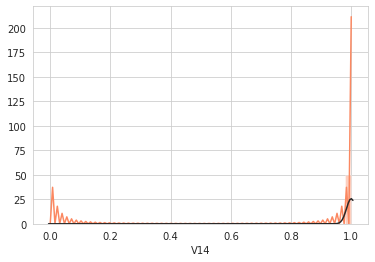

In [0]:
sns.distplot(df_new.V14,fit=norm, color='#FB8861')

In [0]:
from scipy.stats import skew
# degree how much it is not skewed
skew(df[numerical_featuress])

In [0]:
skew(df['C1'])

23.95789879990789

In [0]:
#find the threshold beyond which skewness handling is mandatory
#find skewness of all data
#handle skeneww if required
#find the top 10 columns

In [54]:
test = pd.DataFrame({'A':(2,4,np.nan,16,25), 'B':(10,20,30,40,50)})
test

,A,B
0,2.0,10
1,4.0,20
2,NaN,30
3,16.0,40
4,25.0,50


In [55]:
test['A'].replace(np.nan,9, inplace = True)
test

,A,B
0,2.0,10
1,4.0,20
2,9.0,30
3,16.0,40
4,25.0,50
